# Notebook : Module 07 Predictive
# Author Name : Uma M Subramanian
# Date : 10/04/2023

# Part 1 - Linear Regression

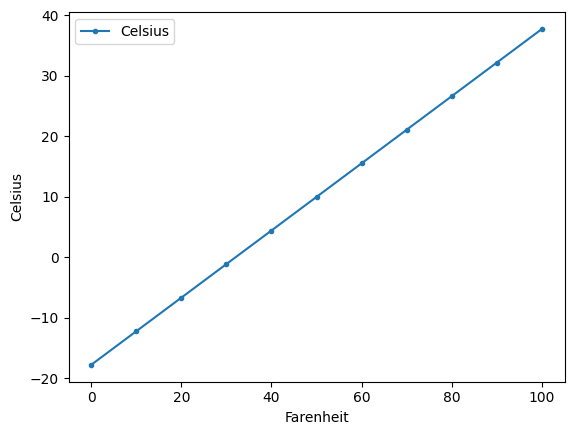

In [1]:
import pandas as pd

c = lambda f: 5/9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
temps_df = pd.DataFrame(temps, columns=['Farenheit', 'Celsius'])
axes = temps_df.plot(x ='Farenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

Section 1 - Load

In [17]:
nyc = pd.read_csv('Data/ave_hi_nyc_jan_1895-2018.csv')

Section 2 - View

In [18]:
nyc.head(), nyc.tail()

(     Date  Value  Anomaly
 0  189501   34.2     -3.2
 1  189601   34.7     -2.7
 2  189701   35.5     -1.9
 3  189801   39.6      2.2
 4  189901   36.4     -1.0,
        Date  Value  Anomaly
 119  201401   35.5     -1.9
 120  201501   36.1     -1.3
 121  201601   40.8      3.4
 122  201701   42.8      5.4
 123  201801   38.7      1.3)

Section 3 - Clean

In [19]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


Section 4 - Describe

In [20]:
pd.set_option('display.precision', 2)

nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

Section 5: Calculate

In [21]:
from scipy import stats

linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)
linear_regression.slope, linear_regression.intercept

(0.014771361132966163, 8.694993233674289)

Section 6: Predict

In [22]:
linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

Section 7: Plot

(10.0, 70.0)

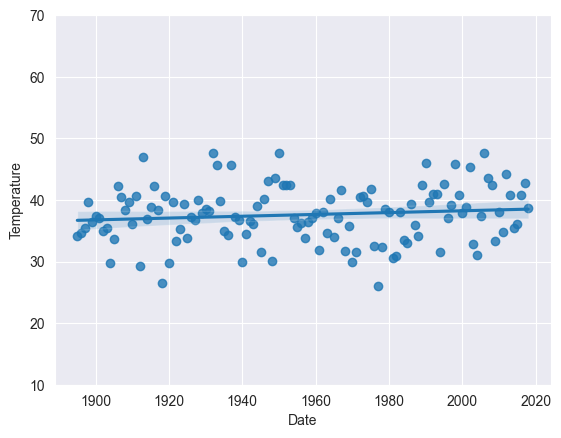

In [35]:
import seaborn as sns
sns.set_style("darkgrid")
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

# Part 2 - Machine Learning

Section 1: Split Data

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Temperature.values, random_state=11)

X_train.shape, X_test.shape

((93, 1), (31, 1))

Section 2: Training

In [25]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

linear_regression.coef_, linear_regression.intercept_

(array([0.01939167]), -0.30779820252656975)

Section 2: Testing

In [26]:
predicted = linear_regression.predict(X_test)
expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected:{e:.2f}')

predicted: 37.86, expected:31.70
predicted: 38.69, expected:34.80
predicted: 37.00, expected:39.40
predicted: 37.25, expected:45.70
predicted: 38.05, expected:32.30
predicted: 37.64, expected:33.80
predicted: 36.94, expected:39.70


Section 3: Predict

In [27]:
predict = (lambda x: linear_regression.coef_*x+linear_regression.intercept_)

predict(2030)

array([39.05729859])

In [32]:
predict = (lambda x: linear_regression.coef_*x+linear_regression.intercept_)

predict(2040)

array([39.25121532])

In [30]:
predict = (lambda x: linear_regression.coef_*x+linear_regression.intercept_)

predict(2050)

array([39.44513205])

Section 4: Plot

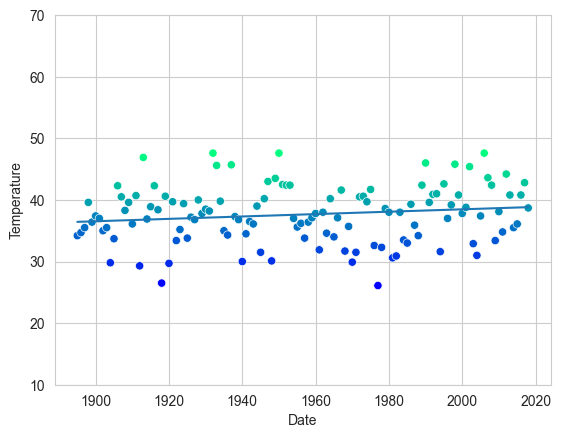

In [31]:
import numpy as np
import matplotlib.pyplot as plt

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10,70)
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)
line = plt.plot(x,y)

Section 5: Conclusion

The part 1 and part 2 are great basis to learn about machine learning. It will explained how it will easy for ML to predict the weather in future 